### Load the data

In [2]:
import pandas as pd 
train = pd.read_csv('data/train.csv', index_col=None)
x_train = train.iloc[:500,1:]
y_train = train['Class']
y_train = y_train[0:500]

x_test = train.iloc[500:,1:]
y_test = train['Class']
y_test = y_test[500:]

### Train all the models

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, max_features=0.5, max_depth= None)   
rf_model = rf_model.fit(x_train, y_train)

In [4]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma=1.0, probability = True)
svm_model = svm_model.fit(x_train, y_train)

In [5]:
from sklearn.naive_bayes import GaussianNB 
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [6]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_train = pca_model.fit_transform(x_train)
explained_variance = pca_model.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(random_state = 0)
lg_model = lg_model.fit(pca_train, y_train)

In [7]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation = 'relu', batch_size = 100, hidden_layer_sizes = (100, 100, 100), solver = 'adam', alpha = 0.0001, random_state = 1)   
nn_model = nn_model.fit(x_train, y_train)

### ROC Curve

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold as SKFold

#random_state = np.random.RandomState(0)
#n_samples, n_features = x_test.shape
#x_test = np.c_[x_test, random_state.randn(n_samples, n_features)]

rf_pred = rf_model.predict(x_test)
svm_pred = svm_model.predict(x_test)
nb_pred = nb_model.predict(x_test)
#lg_pred = lg_model.predict(x_test)
nn_pred = nn_model.predict(x_test)

rf_prob = rf_model.predict_proba(x_test)
svm_prob = svm_model.predict_proba(x_test)
nb_prob = nb_model.predict_proba(x_test)
#lg_prob = lg_model.predict_proba(x_test)
nn_prob = nn_model.predict_proba(x_test)

random_seed = 1234
scv = SKFold(y=train['Class'], n_folds=5, random_state=random_seed)

mean_acc = 0.0
mean_auc = 0.0
all_tpr = []
all_acc = []
all_auc = []

acc = np.sum(y_test == rf_pred)*1./len(y_test)
print('Prediction accuracy:', acc)
fpr, tpr, thresholds = roc_curve(y_test, rf_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Area under ROC curve (AUC):', roc_auc)
plt.plot(fpr, tpr, lw=1, label = 'RandomForest (area = %0.2f)' % ( roc_auc))
all_acc.append(acc)
all_acc.append(roc_auc)

acc = np.sum(y_test == svm_pred)*1./len(y_test)
print('Prediction accuracy:', acc)
fpr, tpr, thresholds = roc_curve(y_test, svm_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Area under ROC curve (AUC):', roc_auc)
plt.plot(fpr, tpr, lw=1, label = 'Support Vector Machine (area = %0.2f)' % ( roc_auc))
all_acc.append(acc)
all_acc.append(roc_auc)

acc = np.sum(y_test == nb_pred)*1./len(y_test)
print('Prediction accuracy:', acc)
fpr, tpr, thresholds = roc_curve(y_test, nb_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Area under ROC curve (AUC):', roc_auc)
plt.plot(fpr, tpr, lw=1, label = 'Naive Bayes (area = %0.2f)' % ( roc_auc))
all_acc.append(acc)
all_acc.append(roc_auc)


acc = np.sum(y_test == nn_pred)*1./len(y_test)
print('Prediction accuracy:', acc)
fpr, tpr, thresholds = roc_curve(y_test, nn_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Area under ROC curve (AUC):', roc_auc)
plt.plot(fpr, tpr, lw=1, label = 'Neural Network (area = %0.2f)' % ( roc_auc))
all_acc.append(acc)
all_acc.append(roc_auc)


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))#, label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Prediction accuracy: 0.844
Area under ROC curve (AUC): 0.8527146666666666
Prediction accuracy: 0.748
Area under ROC curve (AUC): 0.230592
Prediction accuracy: 0.646
Area under ROC curve (AUC): 0.5719573333333333
Prediction accuracy: 0.84
Area under ROC curve (AUC): 0.8573653333333332


### Precision

Text(0.5,1,'F0.5 Scores for Classifiers - Precision')

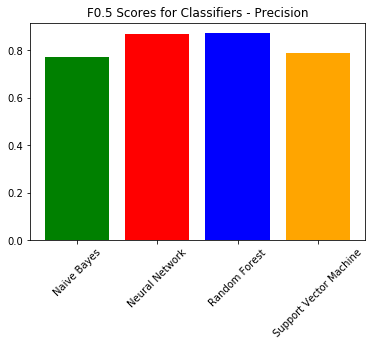

In [9]:
from sklearn.metrics import fbeta_score

rf_f = fbeta_score(y_test, rf_pred, average = 'binary', pos_label = 1, beta = 0.5)
svm_f = fbeta_score(y_test, svm_pred, average = 'binary', pos_label = 1, beta = 0.5)
nb_f = fbeta_score(y_test, nb_pred, average = 'binary', pos_label = 1, beta = 0.5)
nn_f = fbeta_score(y_test, nn_pred, average = 'binary', pos_label = 1, beta = 0.5) 

plt.bar(x = ('Random Forest', 'Support Vector Machine', 'Naive Bayes',
             'Neural Network'), height = (rf_f, svm_f, nb_f, nn_f), color= ('b','orange','g','r'))
plt.xticks(rotation=45)
plt.title('F0.5 Scores for Classifiers - Precision')


### Recall

Text(0.5,1,'F2 Scores for Classifiers - Recall')

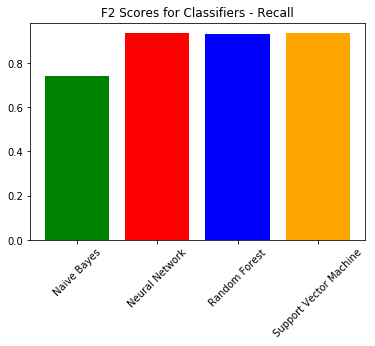

In [10]:
from sklearn.metrics import fbeta_score

rf_f = fbeta_score(y_test, rf_pred, average = 'binary', pos_label = 1, beta = 2)
svm_f = fbeta_score(y_test, svm_pred, average = 'binary', pos_label = 1, beta = 2)
nb_f = fbeta_score(y_test, nb_pred, average = 'binary', pos_label = 1, beta = 2)
nn_f = fbeta_score(y_test, nn_pred, average = 'binary', pos_label = 1, beta = 2) 

plt.bar(x = ('Random Forest', 'Support Vector Machine', 'Naive Bayes',
             'Neural Network'), height = (rf_f, svm_f, nb_f, nn_f), color= ('b','orange','g','r'))
plt.xticks(rotation=45)
plt.title('F2 Scores for Classifiers - Recall')